In [1]:
import numpy as np
import cvxpy as cp
import matplotlib.pyplot as plt
from PIL import Image
plt.style.use("homework")
np.random.seed(1)

from pathlib import Path

In [2]:
dir = Path("GenderData")

In [3]:
male_dir = dir / "Male"
im_shape = (60, 48)

In [4]:
male_fn = [fn for fn in male_dir.iterdir()]

In [5]:
X_male = np.zeros((len(male_fn), 2880), dtype=np.int64)

for i, fn in enumerate(male_fn):
    im = Image.open(fn)
    X_male[i] = np.array(im.getdata())

In [6]:
female_dir = dir / "Female"
female_fn = [fn for fn in female_dir.iterdir()]
X_female = np.zeros((len(female_fn), 2880), dtype=np.int64)

for i, fn in enumerate(female_fn):
    im = Image.open(fn)
    X_female[i] = np.array(im.getdata())

In [7]:
M = 150
N = 2880
train_idx = np.random.choice(range(200), M)

In [8]:
mask = np.zeros(200, dtype=np.bool)
mask[train_idx] = True

In [9]:
X_male_train = X_male[train_idx]
X_female_train = X_female[train_idx]


In [10]:
X_male_test = X_male[~mask]
X_female_test = X_female[~mask]

### Support Vector Classifier

$$
\begin{aligned}
\text{minimize} \quad & \| a \|_2 + \gamma (\mathbf 1^T u + \mathbf 1^T v) \\
\text{subject to} \quad & a^T x_i - b \geq 1 - u_i, \quad i = 1, \ldots, N\\
& a^T y_i - b \leq -(1 - v_i), \quad i = 1, \ldots, M\\
& u \succeq 0, \quad v \succeq 0.
\end{aligned}
$$

In [11]:
# Slack variables
u = cp.Variable(M, nonneg=True)
v = cp.Variable(M, nonneg=True)

t = cp.Variable()

a = cp.Variable(N)
b = cp.Variable()

gamma = cp.Parameter(nonneg=True)

constraints = [
    a.T @ X_male_train.T - b >= t,
    a.T @ X_female_train.T - b <= -t,
    cp.norm2(a) <= 1
]

# obj = cp.Minimize(cp.norm2(a) + gamma * (cp.sum(u) + cp.sum(v)))
obj = cp.Maximize(t)

prob = cp.Problem(obj, constraints)

In [12]:
prob.solve(verbose=True)

                                     CVXPY                                     
                                    v1.1.11                                    
(CVXPY) May 06 09:48:36 PM: Your problem has 2882.0 variables, 3 constraints, and 0 parameters.
(CVXPY) May 06 09:48:36 PM: It is compliant with the following grammars: DCP, DQCP
(CVXPY) May 06 09:48:36 PM: (If you need to solve this problem multiple times, but with different data, consider using parameters.)
(CVXPY) May 06 09:48:36 PM: CVXPY will first compile your problem; then, it will invoke a numerical solver to obtain a solution.
-------------------------------------------------------------------------------
                                  Compilation                                  
-------------------------------------------------------------------------------
(CVXPY) May 06 09:48:36 PM: Compiling problem (target solver=ECOS).
(CVXPY) May 06 09:48:36 PM: Reduction chain: FlipObjective -> Dcp2Cone -> CvxAttr2Constr -> 

137.28599089442662

In [13]:
test_male = a.value @ X_male_test.T - b.value
print(f"male test accuracy: {(test_male > 0).mean():.1%}")

test_female = a.value @ X_female_test.T - b.value
print(f"female test accuracy: {(test_female < 0).mean():.1%}")


male test accuracy: 97.9%
female test accuracy: 91.5%


In [14]:
male_support_vectors = np.argsort(constraints[0].dual_value)
female_support_vectors = np.argsort(constraints[1].dual_value)

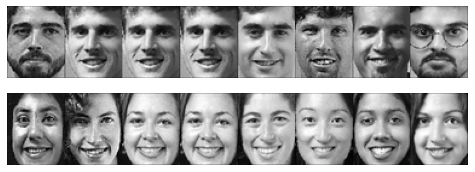

In [15]:
aspect = im_shape[0] / im_shape[1]

fig, axs = plt.subplots(2, 8, figsize=(8 / aspect, 2 + .4))

for i in range(8):
    male = X_male_train[male_support_vectors[i]].reshape(im_shape)
    female = X_female_train[female_support_vectors[i]].reshape(im_shape)
    # Find two pictures in train and test set for each label
    axs[0, i].imshow(male)
    axs[1, i].imshow(female)
    axs[0, i].axis("off")
    axs[1, i].axis("off")

plt.subplots_adjust(wspace=0, hspace=0, left=0, right=1, bottom=0, top=1)

In [16]:
# Show misclassified
error_male = X_male_test[test_male < 0]
error_female = X_female_test[test_female > 0]

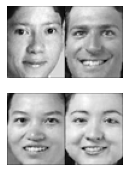

In [19]:
aspect = im_shape[0] / im_shape[1]
num = 2

fig, axs = plt.subplots(2, num, figsize=(num / aspect, 2 + .4))

for i in range(num):
    male = error_male[i].reshape(im_shape)
    female = error_female[i].reshape(im_shape)
    # Find two pictures in train and test set for each label
    axs[0, i].imshow(male)
    axs[1, i].imshow(female)
    axs[0, i].axis("off")
    axs[1, i].axis("off")

plt.subplots_adjust(wspace=0, hspace=0, left=0, right=1, bottom=0, top=1)

In [22]:
from sklearn.datasets import make_blobs
from sklearn.datasets import make_classification


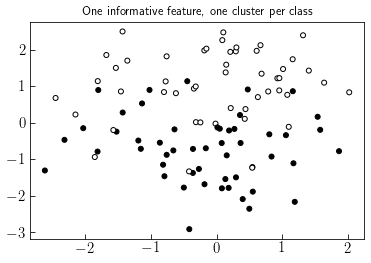

In [30]:
plt.title("One informative feature, one cluster per class", fontsize='small')
X1, Y1 = make_classification(
    n_features=2, n_redundant=0, n_informative=1,
    n_clusters_per_class=1)
plt.scatter(X1[:, 0], X1[:, 1], marker='o', c=Y1,
            s=25, edgecolor='k')
Y1[Y1 == 0] = -1

In [31]:
Y1

array([-1,  1, -1, -1, -1, -1, -1, -1,  1,  1,  1, -1,  1, -1, -1,  1, -1,
        1, -1, -1, -1,  1,  1, -1,  1, -1,  1, -1, -1,  1, -1, -1,  1,  1,
       -1,  1, -1,  1, -1,  1, -1, -1,  1, -1, -1, -1,  1, -1,  1,  1, -1,
       -1, -1,  1,  1,  1,  1,  1, -1,  1,  1, -1, -1,  1, -1, -1,  1,  1,
       -1, -1,  1,  1,  1,  1,  1,  1,  1, -1, -1,  1, -1, -1, -1, -1,  1,
       -1,  1,  1, -1,  1,  1,  1, -1,  1, -1,  1, -1, -1,  1,  1])

In [34]:
X1.T.shape

(2, 100)

In [60]:
# Slack variables
N = 2
u = cp.Variable(X1.shape[0], nonneg=True)

a = cp.Variable(N)
b = cp.Variable()

gamma = cp.Parameter(nonneg=True)

constraints = [
    Y1 @ (a.T @ X1.T - b) >= 1 - u
]

obj = cp.Minimize(cp.norm2(a) + gamma * (cp.sum(u)))
# obj = cp.Maximize(t)

prob = cp.Problem(obj, constraints)

In [63]:
gamma.value = .1
prob.solve()

-5.240897525559379e-11

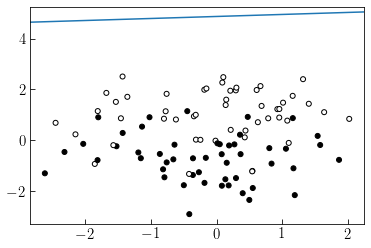

In [64]:
plt.scatter(X1[:, 0], X1[:, 1], marker='o', c=Y1,
            s=25, edgecolor='k')
plt.axline([0, b.value], slope=a.value[0] / a.value[1])

In [49]:
a.value[1] / a.value[0]

12.581239906664555